## Interactive Testing

Starting Recording of test sound
Ended Recording
64000
64000
ITL is 67.8187107512
Here


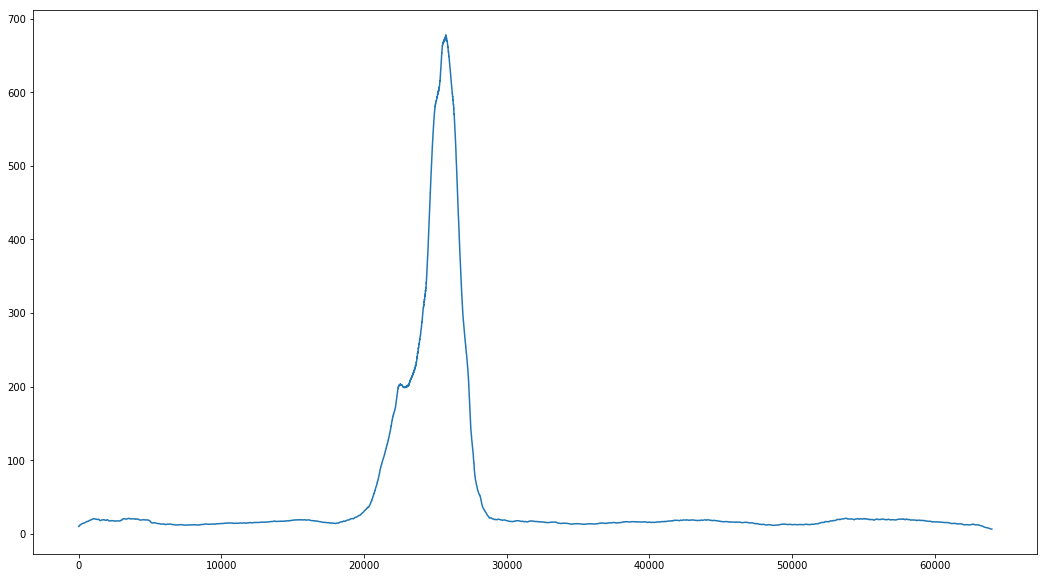

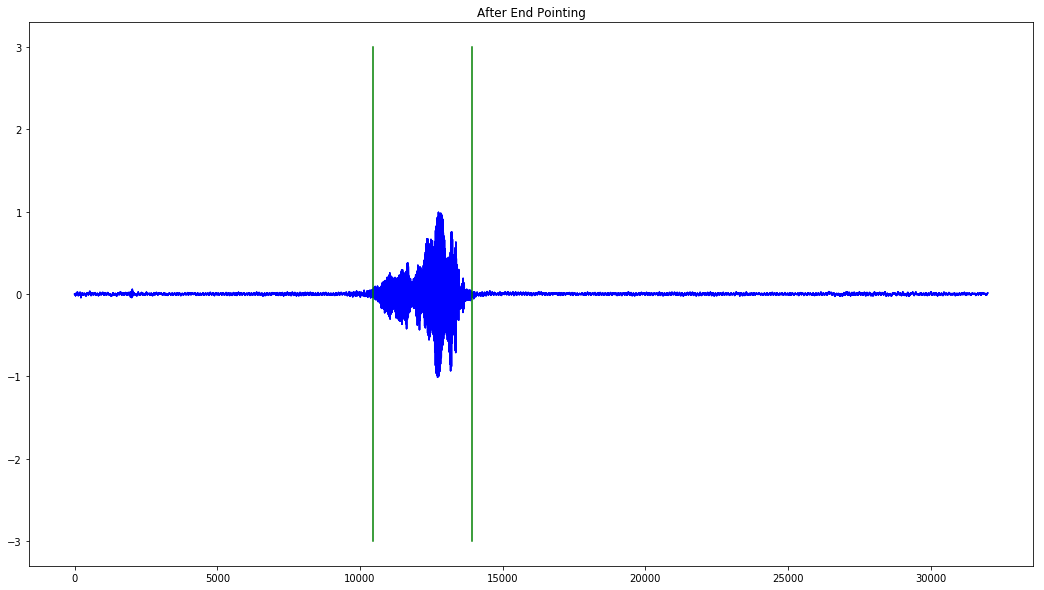

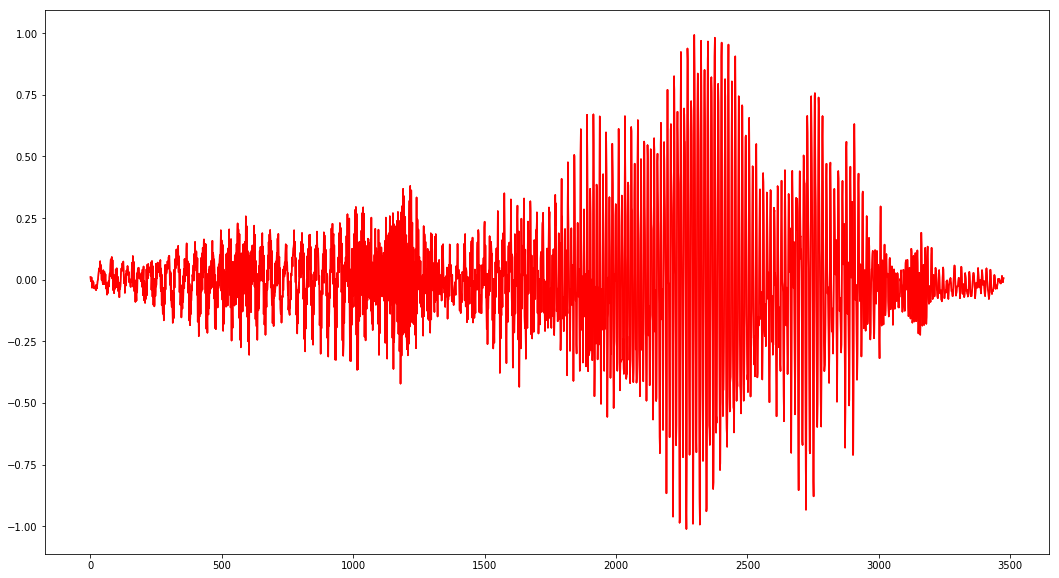

In [3]:
%matplotlib inline
from scipy import signal
from scipy.io.wavfile import write,read
import matplotlib.pyplot as plt
import math
import numpy as np
import IPython
from numpy import convolve
from scipy.signal import hamming
from scipy.ndimage.interpolation import shift
from scipy.linalg import toeplitz,inv
from scipy.fftpack import fft,fftshift,ifft,dct
from python_speech_features import *
from live_endpointing import *
import sounddevice as sd
plt.rcParams["figure.figsize"] = (18,10)

# Read feature vectors from file
duration = 4  # seconds
fs=8000
print("Starting Recording of test sound")
inp = sd.rec(int(duration * fs), samplerate=fs, channels=2,blocking=True)
print("Ended Recording")

#myrecording = sd.playrec(myrecording, fs, channels=2)

#read_wav = read('./ept.wav')
#inp=np.array(read_wav[1],dtype='float64')

processed_inp,start,end=live_endpointer(inp,fs)
myrecording = sd.playrec(processed_inp, fs, channels=2)

plt.show()
plt.title("After End Pointing",fontsize=20)
plt.plot(inp,'blue')
plt.plot([start,start],[-3,3],'green')
plt.plot([end,end],[-3,3],'green')
plt.show()
plt.plot(processed_inp,'red')
plt.show()

mfcc_feat=mfcc(processed_inp,samplerate=8000,winlen=0.01,winstep=0.01,numcep=13,nfilt=26,nfft=512,lowfreq=0,highfreq=None,preemph=0.97,ceplifter=22,appendEnergy=True)



In [4]:
pred=np.zeros(10)

for d in range(10):
    dist=0
    count=1
    filename="./VQ_codebooks/All/"+str(d)+"/k8.npy"
    kmeans=np.load(filename)
    for j in range(mfcc_feat.shape[0]):
        # Find Closest Matching Frame
        # Instead of adding distancesto all centroids, add distance to one centroid min
        begin=True
        min_dist_to_a_centroid=0
        for centroid in kmeans:
            obt_dist=np.sum(np.abs(mfcc_feat[j]-centroid))
            if(begin):
                min_dist_to_a_centroid=obt_dist
                begin=False
            else:
                if(obt_dist<min_dist_to_a_centroid):
                    min_dist_to_a_centroid=obt_dist
                    
        dist=dist+min_dist_to_a_centroid
        count=count+1
    pred[d]=(dist/count)
    print(str(d)+":"+str(pred[d]))
predic=np.argmin(pred)
print("Predicted: "+ str(predic)+" for expected digit")

0:158.117883368
1:158.225823089
2:164.838472315
3:175.828482414
4:158.86926455
5:162.913299403
6:175.0166534
7:164.904861098
8:165.349494982
9:165.913237056
Predicted: 0 for expected digit
